In [52]:
import xgboost as xgb 
from xgboost import XGBRegressor as XGBR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import LinearRegression as LinearR
from sklearn.datasets import load_boston
from sklearn.model_selection import KFold, cross_val_score as CVS, train_test_split as TTS
from sklearn.metrics import mean_squared_error as MSE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
import datetime
from xgboost import XGBClassifier as XGBC
plt.rc('font',family='Times New Roman')
#plt.tick_params(labelsize=23)

In [53]:
data = pd.read_csv("forpy_notadd.csv",index_col=0)

In [54]:
data

,CCL2,MPO,ERBB2,CDH5,KDR,IRS1,FLT1,FGFR3,EGFR,group
GSM2327319,11.375921,6.436740,6.419324,11.654892,7.062209,6.356742,6.364039,6.407450,6.543986,1
GSM2327320,10.914550,6.401747,6.487062,11.722128,6.801582,6.489184,6.250091,6.447602,6.568951,1
GSM2327321,12.138273,6.451564,6.529733,11.783378,6.943129,6.325395,6.430945,6.511473,6.477756,1
GSM2327322,12.476969,6.467920,6.439146,11.954031,7.110789,6.340811,6.406373,6.646261,6.535719,1
GSM2327323,11.426055,6.392175,6.375613,12.011893,7.268497,6.437126,6.480035,6.640277,6.528263,1
...,...,...,...,...,...,...,...,...,...,...
GSM4669967,14.427014,16.748889,16.426965,15.426981,18.035763,16.805472,17.987669,14.105102,16.192502,1
GSM4669968,14.674236,17.133622,17.133622,15.259180,17.761650,16.481551,17.532169,14.996153,16.761657,1
GSM4669969,13.339251,16.924086,16.924086,16.509052,16.924086,15.798568,18.316396,15.146506,16.661054,1
GSM4669970,15.761670,16.083592,16.700257,16.083592,17.877127,16.569013,17.221085,14.498671,17.498617,1


In [55]:
X = data.iloc[:,:-1]

y = data.iloc[:,-1]

In [56]:
X.shape

(101, 9)

In [57]:
y

GSM2327319    1
GSM2327320    1
GSM2327321    1
GSM2327322    1
GSM2327323    1
             ..
GSM4669967    1
GSM4669968    1
GSM4669969    1
GSM4669970    1
GSM4669971    1
Name: group, Length: 101, dtype: int64

In [58]:
(y == 1).sum() / y.shape[0]

0.43564356435643564

In [59]:
Xtrain, Xtest, Ytrain, Ytest = TTS(X,y,test_size=0.2,random_state=420)

In [63]:
?xgb.cv

In [91]:
dfull = xgb.DMatrix(X,y)

param1 = {
          
          "subsample":1
          ,"max_depth":6
          ,"eta":0.3
          ,"gamma":0
          ,"lambda":1
          ,"alpha":0
          ,"colsample_bytree":1
          ,"colsample_bylevel":1
          ,"colsample_bynode":1
          }
num_round = 200
param2 = {
          
          "subsample":1
          ,"max_depth":3
          ,"eta":0.1
         ,"gamma":0.8 
          ,"lambda":0.6
          ,"alpha":0
          ,"colsample_bytree":1 
          ,"colsample_bylevel":1
          ,"colsample_bynode":1
          }
cvresult1 = xgb.cv(param1, dfull, num_round,nfold=3,metrics="error")
cvresult2 = xgb.cv(param2, dfull, num_round,nfold=3,metrics="error")

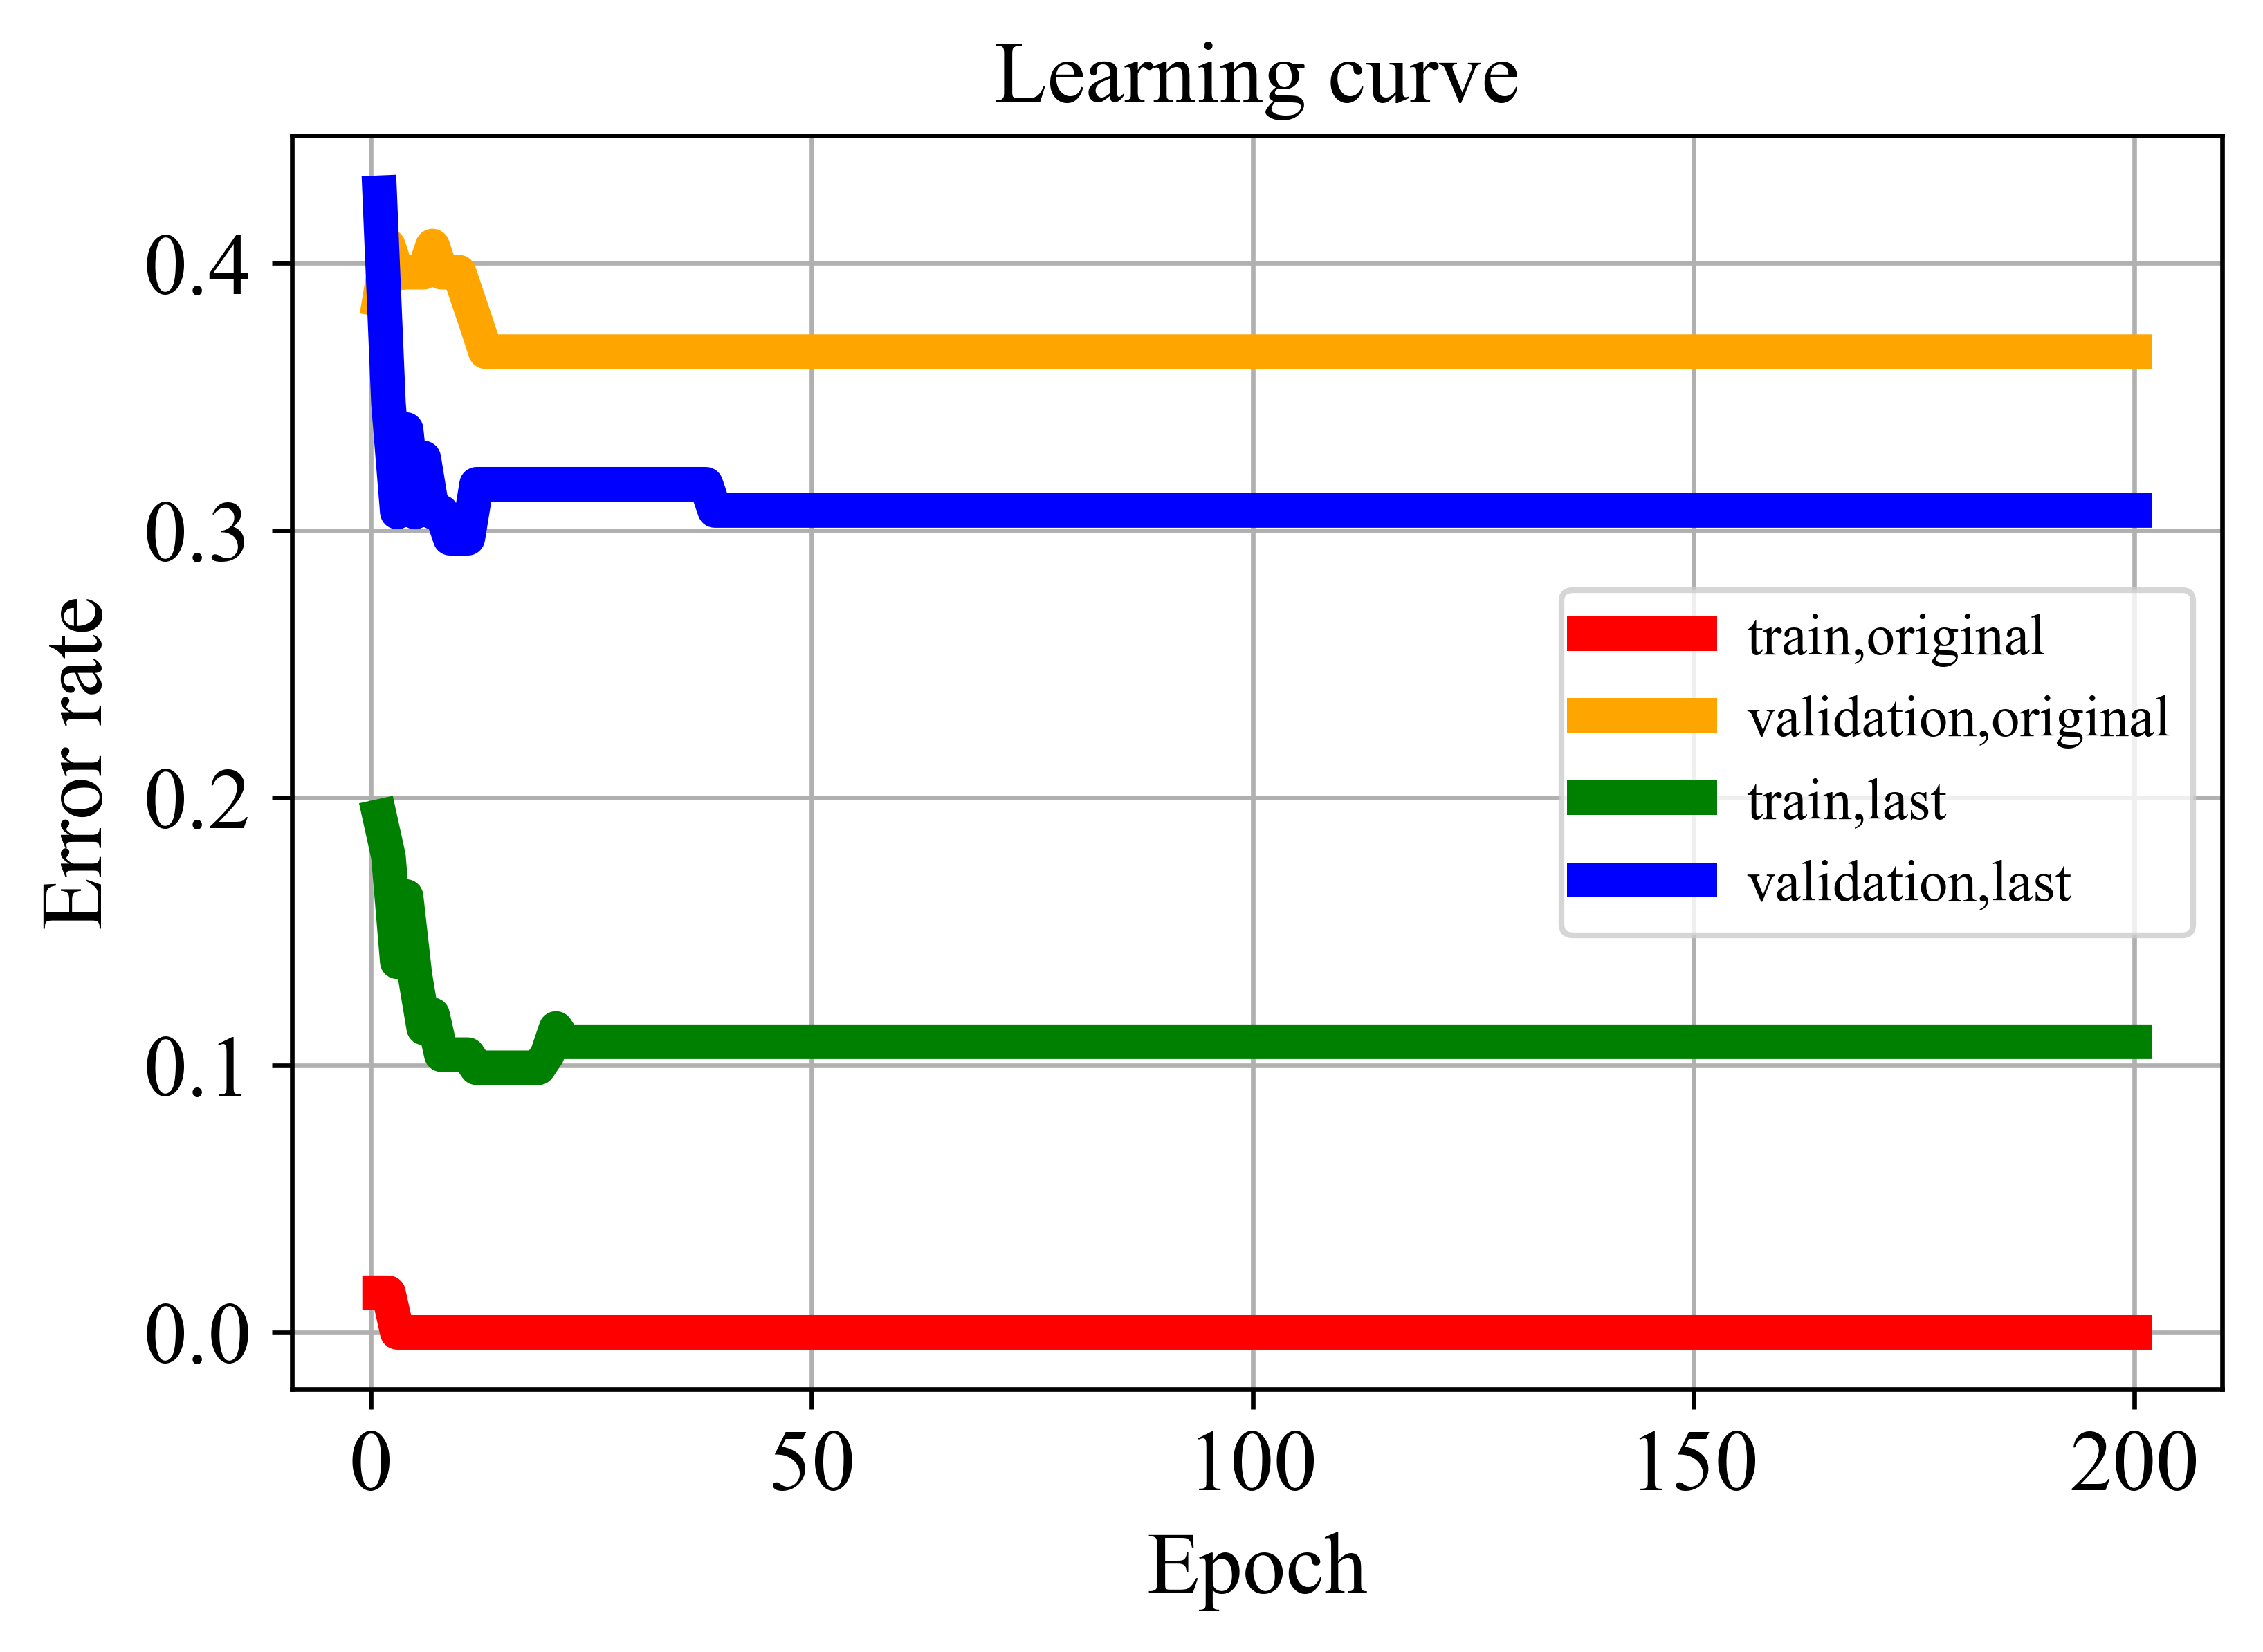

In [92]:
plt.figure(dpi=600,figsize=(6,4))
#fig,ax = plt.subplots(1,figsize=(15,8))
plt.tick_params(labelsize=15)
#ax.set_ylim(top=5)
plt.grid()
#ax.tick_params(labelsize=30)
plt.plot(range(1,201),cvresult1.iloc[:,0],c="red",label="train,original",linewidth=6)
plt.plot(range(1,201),cvresult1.iloc[:,2],c="orange",label="validation,original",linewidth=6)
plt.plot(range(1,201),cvresult2.iloc[:,0],c="green",label="train,last",linewidth=6)
plt.plot(range(1,201),cvresult2.iloc[:,2],c="blue",label="validation,last",linewidth=6)
#plt.legend(fontsize=25)
plt.xlabel('Epoch',fontsize=15)
plt.ylabel('Error rate',fontsize=15)
plt.title('Learning curve',fontsize=15)
plt.legend(loc="best")
plt.savefig("train_line2.pdf",dpi=600,bbox_inches='tight')
plt.show()

In [93]:
dtrain = xgb.DMatrix(Xtrain,Ytrain)
dtest = xgb.DMatrix(Xtest,Ytest)

In [94]:
param=param2

In [95]:
bst = xgb.train(param, dtrain, num_round)

In [96]:
preds = bst.predict(dtest)
preds

array([0.38085508, 0.5688094 , 0.23084888, 0.542657  , 0.5688094 ,
       0.25757712, 0.36118633, 0.36118633, 0.38085508, 0.56019604,
       0.23084888, 0.25757712, 0.31017548, 0.3653612 , 0.5069606 ,
       0.36118633, 0.41984302, 0.23084888, 0.58692455, 0.5069606 ,
       0.28738394], dtype=float32)

In [97]:
ypred = preds.copy()
ypred[preds > 0.5] = 1
ypred

array([0.38085508, 1.        , 0.23084888, 1.        , 1.        ,
       0.25757712, 0.36118633, 0.36118633, 0.38085508, 1.        ,
       0.23084888, 0.25757712, 0.31017548, 0.3653612 , 1.        ,
       0.36118633, 0.41984302, 0.23084888, 1.        , 1.        ,
       0.28738394], dtype=float32)

In [98]:
ypred[ypred != 1] = 0

In [99]:
ypred

array([0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0.], dtype=float32)

In [100]:
Ytest

Sample_665_CF    0
GSM4669942       1
GSM4669914       0
GSM4669939       1
GSM4669901       0
GSM4669932       0
GSM4669913       0
GSM4669946       1
Sample_338_DF    1
Sample_252_DM    1
GSM4669919       0
GSM4669896       0
Sample_620_CM    0
GSM2327326       0
GSM4669952       1
GSM4669915       0
GSM2327319       1
Sample_812_CF    0
Sample_324_DF    1
GSM4669966       1
GSM4669922       0
Name: group, dtype: int64

In [101]:
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from xgboost import XGBClassifier as XGBC
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split as TTS
from sklearn.metrics import confusion_matrix as cm, recall_score as recall, roc_auc_score as auc

In [102]:
auc(Ytest,preds)

0.8981481481481481

In [103]:
from sklearn.metrics import accuracy_score as accuracy

In [104]:
accuracy(Ytest,ypred)

0.8095238095238095

In [105]:
from sklearn.metrics import roc_curve as ROC
from sklearn.metrics import roc_auc_score, recall_score

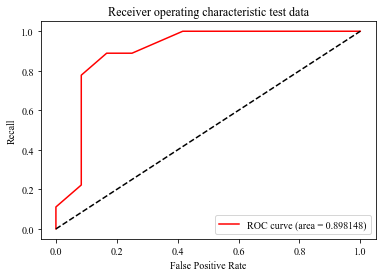

In [106]:
FPR, Recall, thresholds = ROC(Ytest,preds,pos_label=1)
area = roc_auc_score(Ytest,preds)
plt.figure()
plt.plot(FPR, Recall, color='red',
         label='ROC curve (area = %f)' % area)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('Receiver operating characteristic test data')
plt.legend(loc="lower right")
plt.savefig("test.png")
plt.show()

In [107]:
preds = bst.predict(dtrain)
preds

array([0.542657  , 0.40816748, 0.53368914, 0.5955379 , 0.43533713,
       0.51827   , 0.23084888, 0.25757712, 0.23084888, 0.62534493,
       0.23084888, 0.5688094 , 0.38733846, 0.23084888, 0.23084888,
       0.38733846, 0.55609787, 0.62534493, 0.34740758, 0.38085508,
       0.5955379 , 0.41984302, 0.27281007, 0.542657  , 0.3629516 ,
       0.53368914, 0.62534493, 0.43533713, 0.5693856 , 0.542657  ,
       0.52296394, 0.23084888, 0.2971971 , 0.38733846, 0.4977621 ,
       0.5693856 , 0.5688094 , 0.23084888, 0.5069606 , 0.3876596 ,
       0.542657  , 0.36118633, 0.62534493, 0.38733846, 0.30644923,
       0.5991924 , 0.5688094 , 0.5955379 , 0.4971859 , 0.62534493,
       0.5991924 , 0.23084888, 0.36093128, 0.25757712, 0.55609787,
       0.30644923, 0.62534493, 0.62534493, 0.23084888, 0.4438738 ,
       0.36118633, 0.5955379 , 0.38733846, 0.3629516 , 0.4971859 ,
       0.2728027 , 0.3629516 , 0.5955379 , 0.23084888, 0.58692455,
       0.542657  , 0.23084888, 0.32548988, 0.43533713, 0.23084

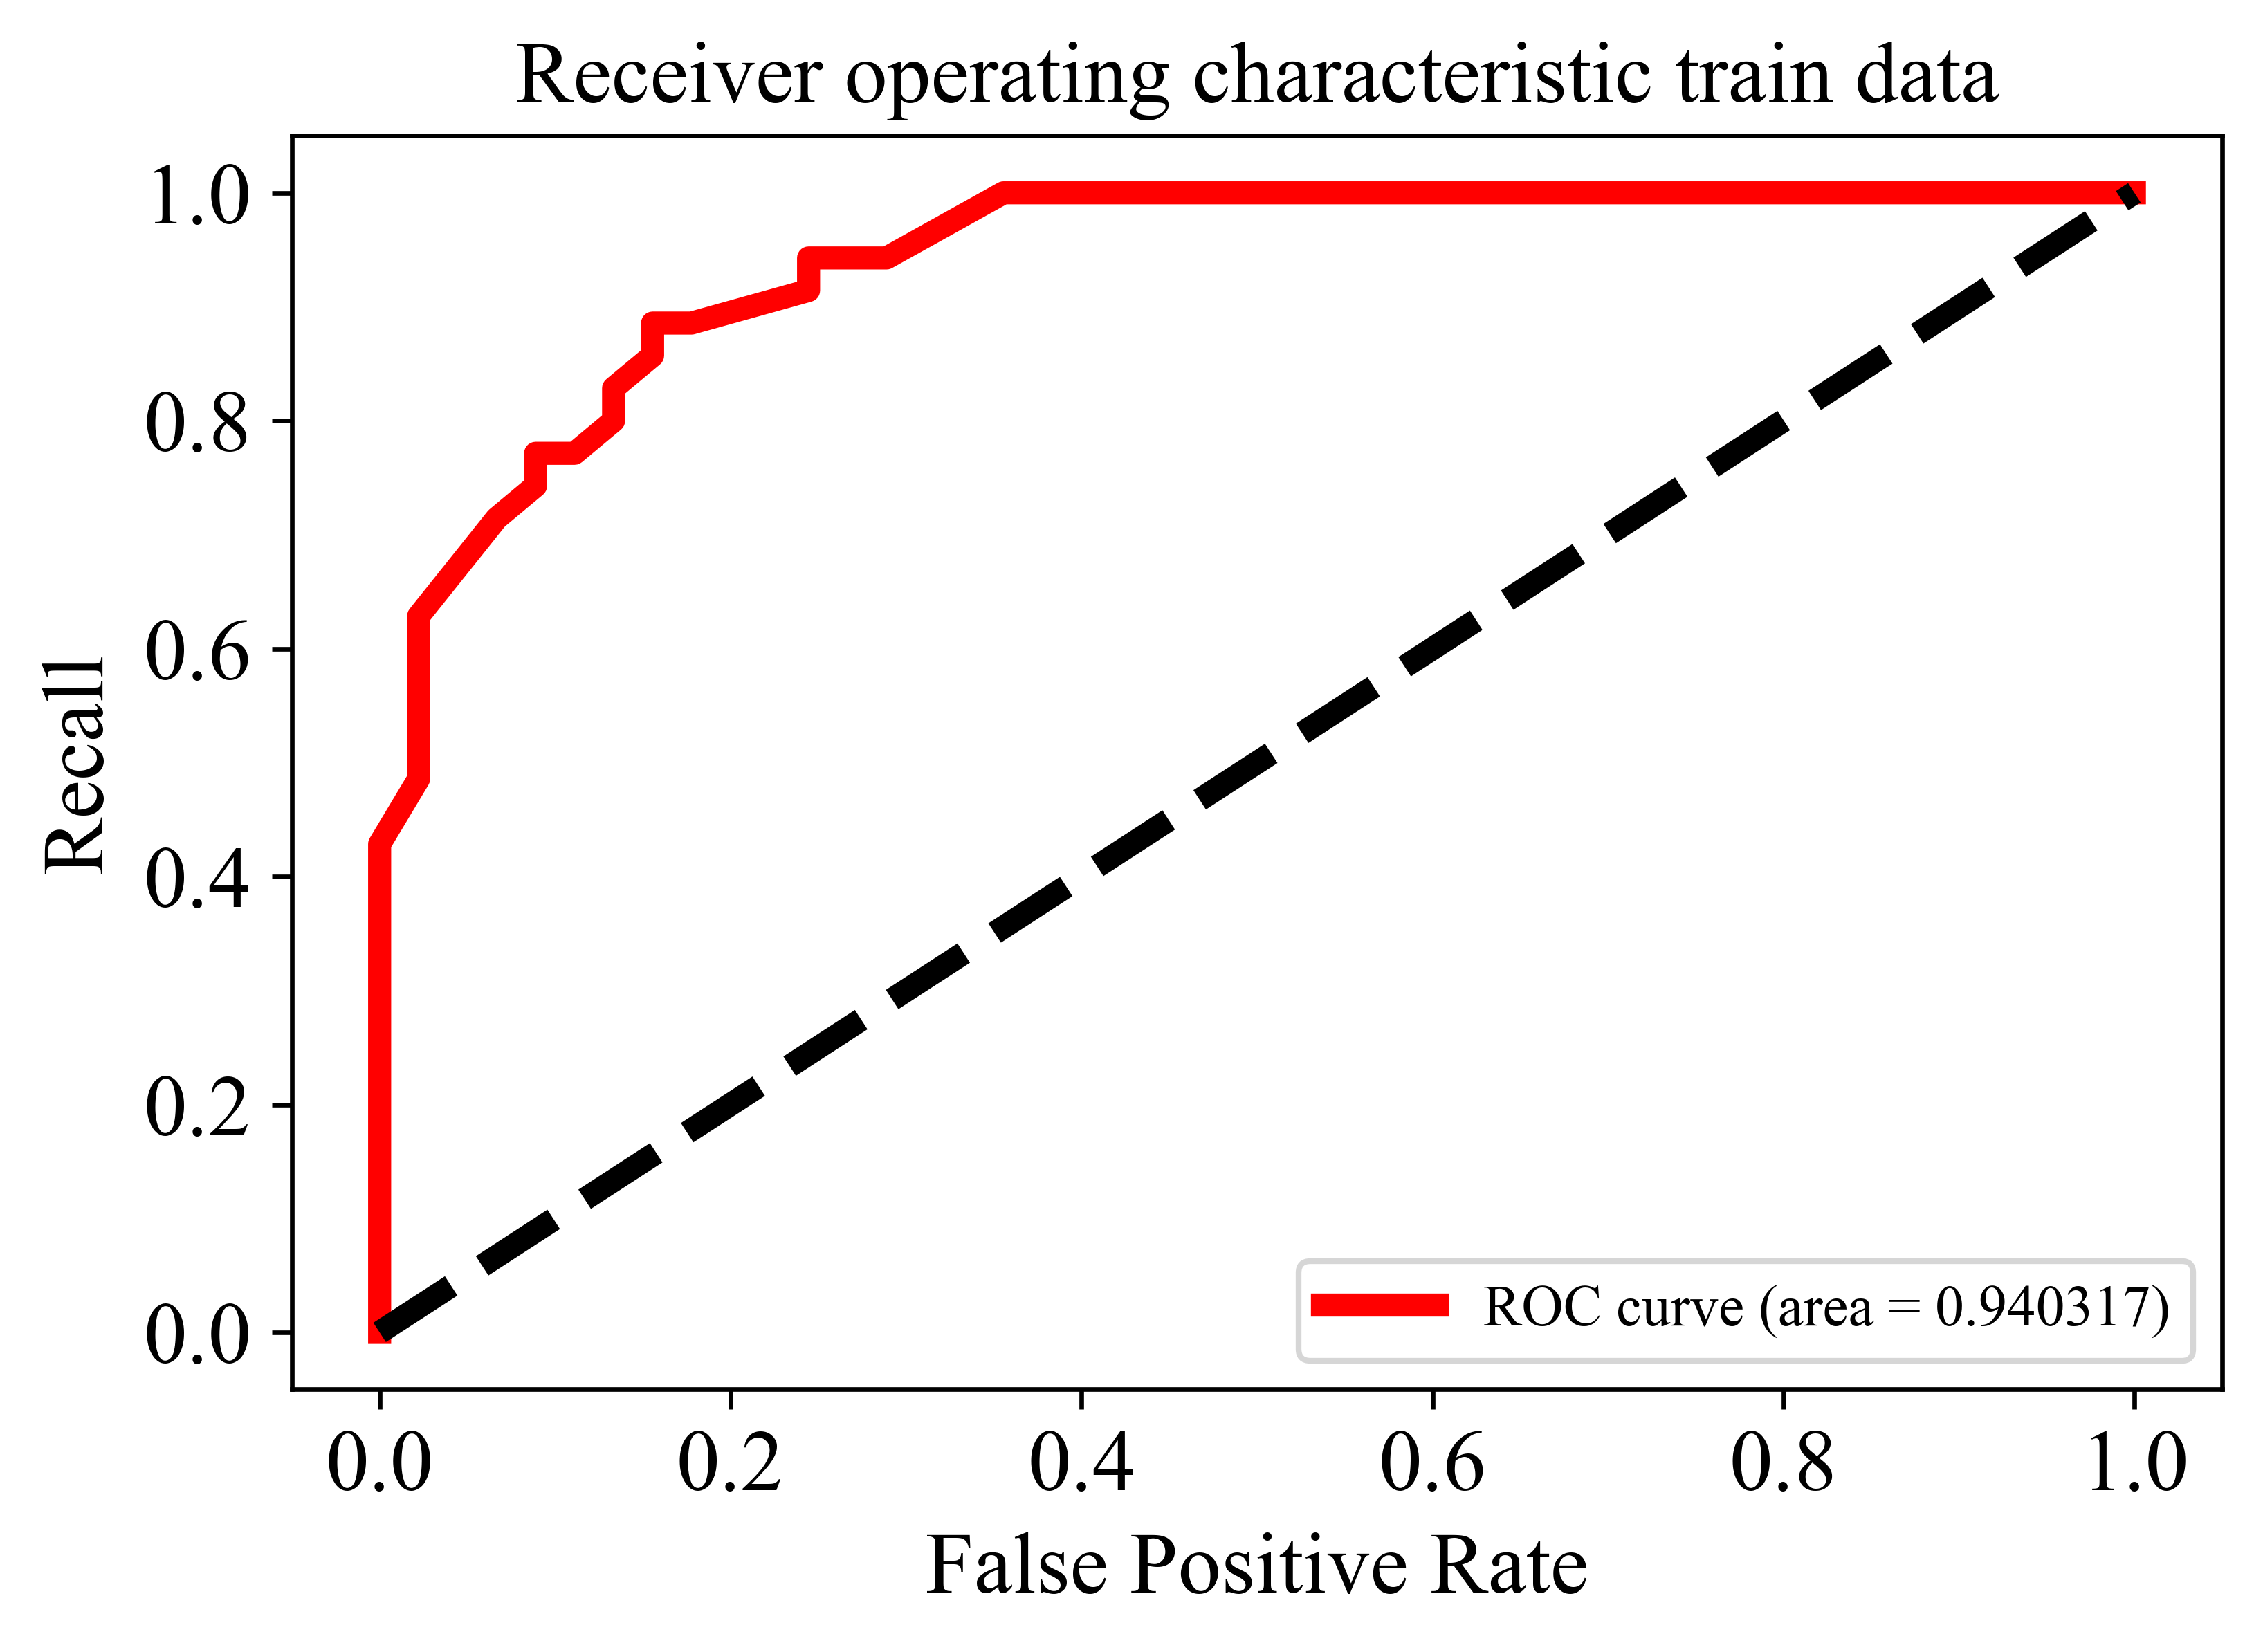

In [108]:
FPR, Recall, thresholds = ROC(Ytrain
                              ,preds,pos_label=1)
area = roc_auc_score(Ytrain,preds)
plt.figure(dpi=600,figsize=(6,4))
plt.tick_params(labelsize=15)
plt.plot(FPR, Recall, color='red',
         label='ROC curve (area = %f)' % area,linewidth=4)
plt.plot([0, 1], [0, 1], color='black', linestyle='--',linewidth=4)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate',fontsize=15)
plt.ylabel('Recall',fontsize=15)
plt.title('Receiver operating characteristic train data',fontsize=15)
plt.legend(loc="lower right")
plt.savefig("train_roc1.pdf",dpi=600,bbox_inches='tight')
plt.show()

In [23]:
aa=XGBC(n_estimators=300,max_depth=3,lamda=0.6,gamma=0.8,learning_rate=0.1)

In [24]:
aa=aa.fit(Xtrain,Ytrain)

[12:34:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { lamda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [25]:
aa.feature_importances_

array([0.11786638, 0.13483888, 0.07596831, 0.07444633, 0.11441842,
       0.1396628 , 0.12670268, 0.12288807, 0.09320813], dtype=float32)

In [26]:
bst.feature_names

['CCL2', 'MPO', 'ERBB2', 'CDH5', 'KDR', 'IRS1', 'FLT1', 'FGFR3', 'EGFR']

In [27]:
from sklearn import tree

In [28]:
clf=tree.DecisionTreeClassifier(criterion="entropy",max_depth=2)

In [29]:
clf=clf.fit(Xtrain,Ytrain)

In [30]:
clf.score(Xtest,Ytest)

0.8095238095238095

In [31]:
area1 = roc_auc_score(Ytest,clf.predict(Xtest))

In [32]:
area1

0.8194444444444444

In [33]:
from sklearn.ensemble import RandomForestClassifier 

In [34]:
rfc=RandomForestClassifier(n_estimators=100,random_state=90)

In [35]:
rfc=rfc.fit(Xtrain,Ytrain)

In [36]:
rfc.score(Xtest,Ytest)

0.7142857142857143

In [37]:
roc_auc_score(Ytest,rfc.predict(Xtest))

0.6944444444444444

In [38]:
CVS(rfc,X,y,cv=5).mean()

0.6838095238095238

In [39]:
from sklearn.svm import SVC

In [40]:
clf1 = SVC(kernel = "linear").fit(Xtrain,Ytrain)

In [41]:
clf1.score(Xtest,Ytest)

0.7142857142857143

In [42]:
roc_auc_score(Ytest,clf1.predict(Xtest))

0.6944444444444444

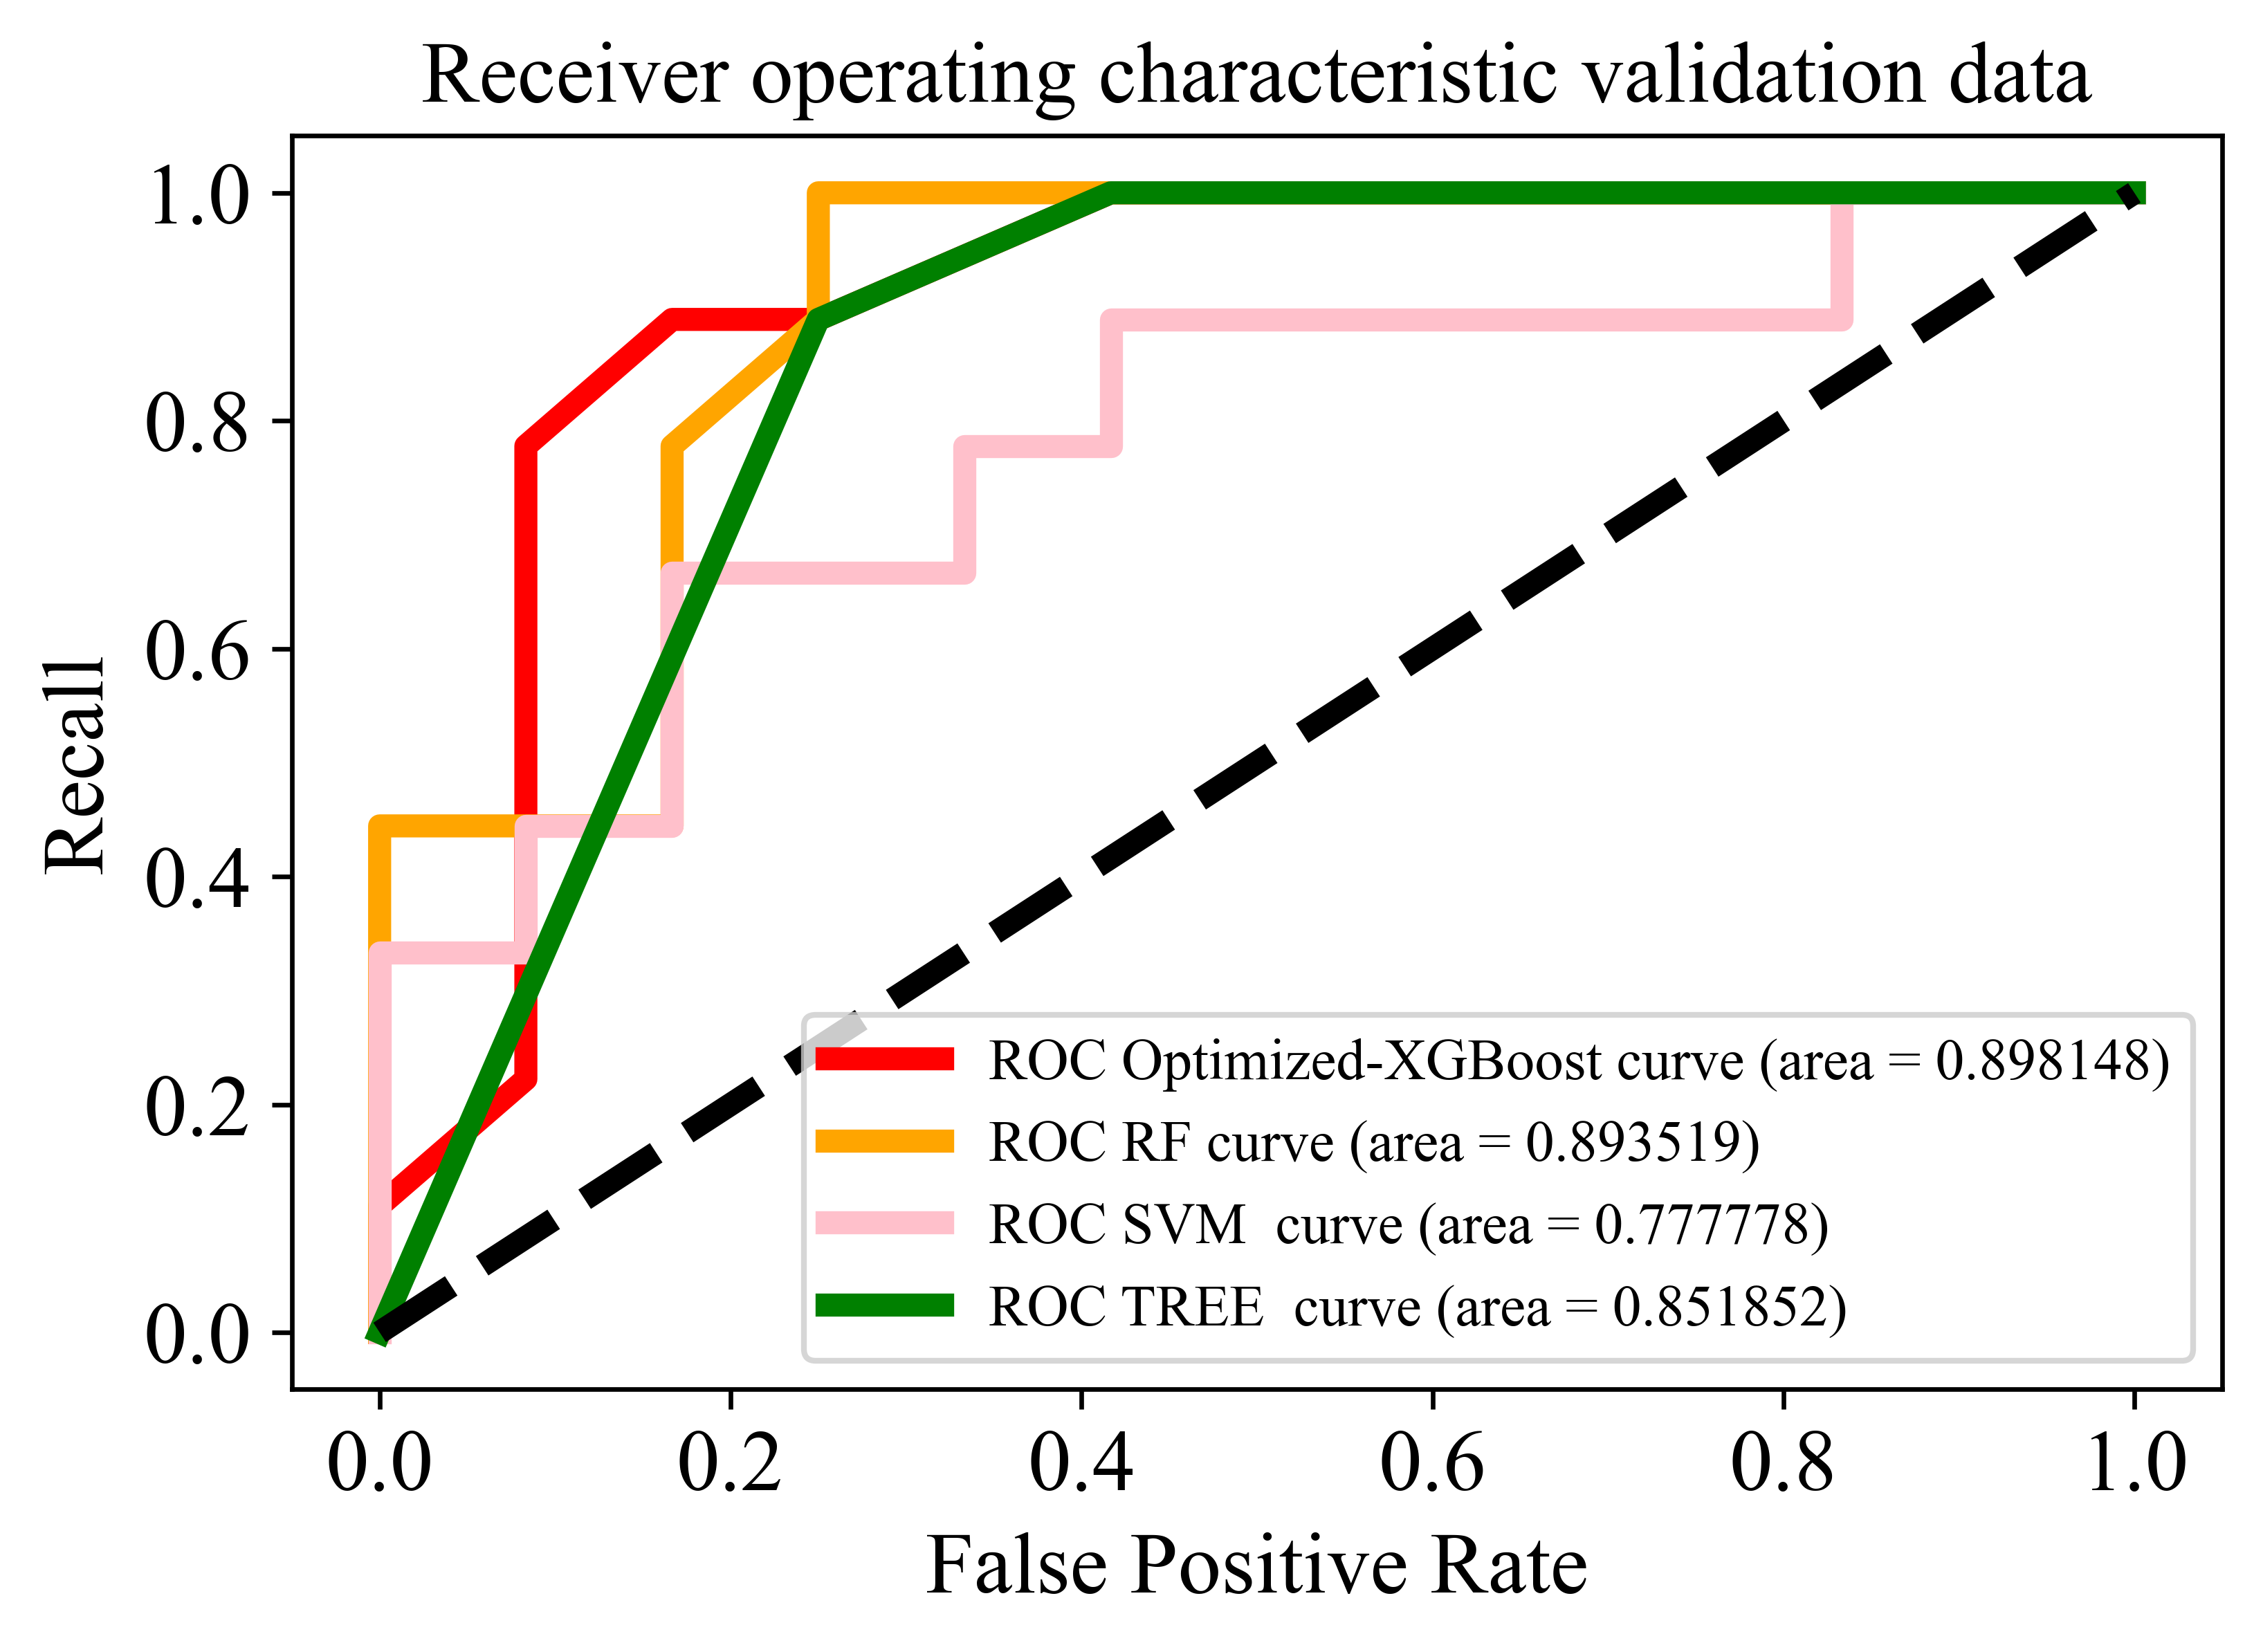

In [43]:
FPR, Recall, thresholds = ROC(Ytest,preds,pos_label=1)
area = roc_auc_score(Ytest,preds)
FPR1, Recall1, thresholds1 = ROC(Ytest,rfc.predict_proba(Xtest)[:,1],pos_label=1)
area1 = roc_auc_score(Ytest,rfc.predict_proba(Xtest)[:,1])
FPR2, Recall2, thresholds2 = ROC(Ytest,clf1.decision_function(Xtest),pos_label=1)
area2 = roc_auc_score(Ytest,clf1.decision_function(Xtest))
FPR3, Recall3, thresholds3 = ROC(Ytest,clf.predict_proba(Xtest)[:,1],pos_label=1)
area3 = roc_auc_score(Ytest,clf.predict_proba(Xtest)[:,1])
#plt.figure(dpi=600)
plt.figure(dpi=600,figsize=(6,4))
plt.tick_params(labelsize=15)
plt.plot(FPR, Recall, color='red',
         label='ROC Optimized-XGBoost curve (area = %f)' % area,linewidth=4)
plt.plot(FPR1, Recall1, color='orange',
         label='ROC RF curve (area = %f)' % area1,linewidth=4)
plt.plot(FPR2, Recall2, color='pink',
         label='ROC SVM  curve (area = %f)' % area2,linewidth=4)
plt.plot(FPR3, Recall3, color='green',
         label='ROC TREE  curve (area = %f)' % area3,linewidth=4)
plt.plot([0, 1], [0, 1], color='black', linestyle='--',linewidth=4)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate',fontsize=15)
plt.ylabel('Recall',fontsize=15)
plt.title('Receiver operating characteristic validation data',fontsize=15)
plt.legend(loc="lower right")
plt.savefig("test22.pdf",dpi=600,bbox_inches='tight')
plt.show()

In [84]:
clf1.decision_function(Xtest)

array([-0.75497451, -0.1012623 , -1.17749254,  0.04636431, -0.29765857,
       -1.27636076, -0.62671181,  0.50097666, -0.66610063, -1.53410786,
       -1.89423501, -0.95752101, -1.36887663,  0.45867053,  0.54652966,
        0.30955   ,  0.55608945, -1.71094912, -0.92381225,  0.33856858,
       -1.29982369])

In [85]:
Ytest

Sample_665_CF    0
GSM4669942       1
GSM4669914       0
GSM4669939       1
GSM4669901       0
GSM4669932       0
GSM4669913       0
GSM4669946       1
Sample_338_DF    1
Sample_252_DM    1
GSM4669919       0
GSM4669896       0
Sample_620_CM    0
GSM2327326       0
GSM4669952       1
GSM4669915       0
GSM2327319       1
Sample_812_CF    0
Sample_324_DF    1
GSM4669966       1
GSM4669922       0
Name: group, dtype: int64